In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats


A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail)

In [166]:
data=pd.read_csv("Wholesale+Customers+Data.csv")
data.head()                   #Get the data
                              #The first 10 records of the data is shown by using head() function.

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [167]:
data.shape                       #gives dimensions of array.

(440, 9)

In [168]:
data.size                        #counts number of elements along a given axis.

3960

In [169]:
data.info()                      #info() method prints information about the DataFrame i.e. number of columns, column labels, column data types, memory usage, range index etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [170]:
data.isnull().sum()            #Returns missing or null values across the columns 

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [171]:
data.describe(include='all').T               
                                                            #It returns many useful descriptive statistics with a mix of measures of central tendency and measures of variability. This includes the number of non-missing observations; the mean; standard deviation; minimum value; 25th, 50th (median),and 75th percentile,as well as the maximum value. 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [172]:
data["Channel"].value_counts()                                #channel and region are categorical variables.value_counts() returns a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default. 

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [173]:
data["Region"].value_counts()                  

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [174]:
data["Total"]=data["Fresh"]+data["Milk"]+data["Grocery"]+data["Frozen"]+data["Detergents_Paper"]+data["Delicatessen"]
data                                        #Added a new column "Total" using sum of the existing columns.

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [175]:

data_final_channel=data.groupby('Channel').sum().reset_index()
data_final_channel                               
     #groupby() function takes up the column name as argument followed by sum() function.reset_index() function resets and provides the new index to the grouped by dataframe and makes them a proper dataframe structure

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


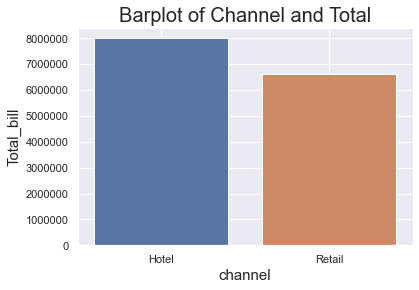

In [176]:
plt.figure()
plt.ticklabel_format(style='plain')                                            
sns.barplot(x='Channel', y='Total', data =data_final_channel,ci=20);
plt.title("Barplot of Channel and Total", fontsize = 20)
plt.xlabel("channel", fontsize = 15)
plt.ylabel("Total_bill", fontsize = 15)                                       #"Hotel" channel spends the most
plt.savefig("Barplot of channel and Total_Bill")      
                                                                          #Retail channel spends the least
plt.grid(True)
plt.show()

In [177]:

data_final_region=data.groupby('Region').sum().reset_index()
data_final_region


,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
2,Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


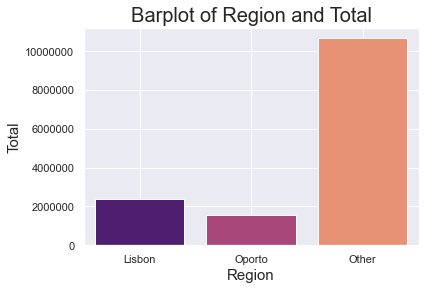

In [178]:
sns.set()
plt.figure()
plt.ticklabel_format(style='plain')                                            
sns.barplot('Region', y='Total', data =data_final_region,ci=20,palette="magma");
plt.title("Barplot of Region and Total", fontsize = 20)
plt.xlabel("Region", fontsize = 15)
plt.ylabel("Total", fontsize = 15)
plt.savefig("Barplot of Region and Total_bill")
plt.grid(True)
plt.show()                                                                        #"Other" region spends the most 
                                                                                 # "Oporto" region spends the least
  



 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [179]:
data

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [180]:
result1=data.groupby('Region').sum()                #Different varieties across Region are shown. "Other" region is spending the maximum and "Oporto" region is spending the minimum
result1

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


In [181]:
final_result=result1.drop(['Buyer/Spender'], axis= 1)
final_result                                                   #Dropped the row "buyer/spender"

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


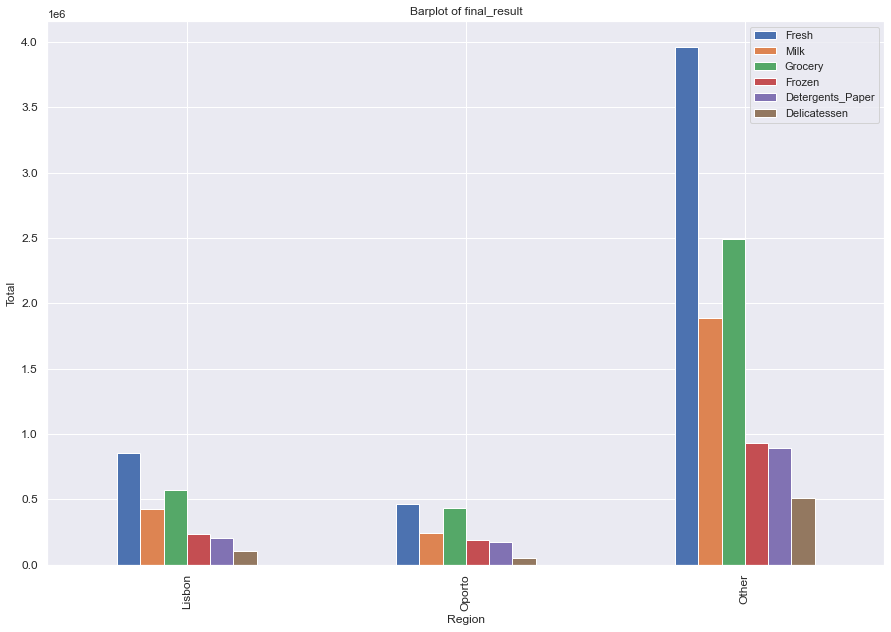

In [182]:


ax1 = final_result[["Fresh",'Milk',"Grocery","Frozen","Detergents_Paper","Delicatessen"]].plot(kind='bar', title ="Barplot of final_result", figsize=(15, 10), legend=True, fontsize=12)
ax1.set_xlabel("Region", fontsize=12)
ax1.set_ylabel("Total", fontsize=12)  
plt.show()
                                                     #Barplot of different varieties across Region is shown.
                                                     #In other region,we are spending the maximum on all varieties
                                                     #In opporto region,we are spending the minimum on all varieties.

In [183]:
result2=data.groupby('Channel').sum()             #Different varieties across channel is shown."hotel" channel is spending more than the "retail" channel
result2                                                       

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


In [184]:
final_result2=result2.drop(['Buyer/Spender'], axis= 1)       
final_result2                                 #Dropped the row "Buyer/spender"

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


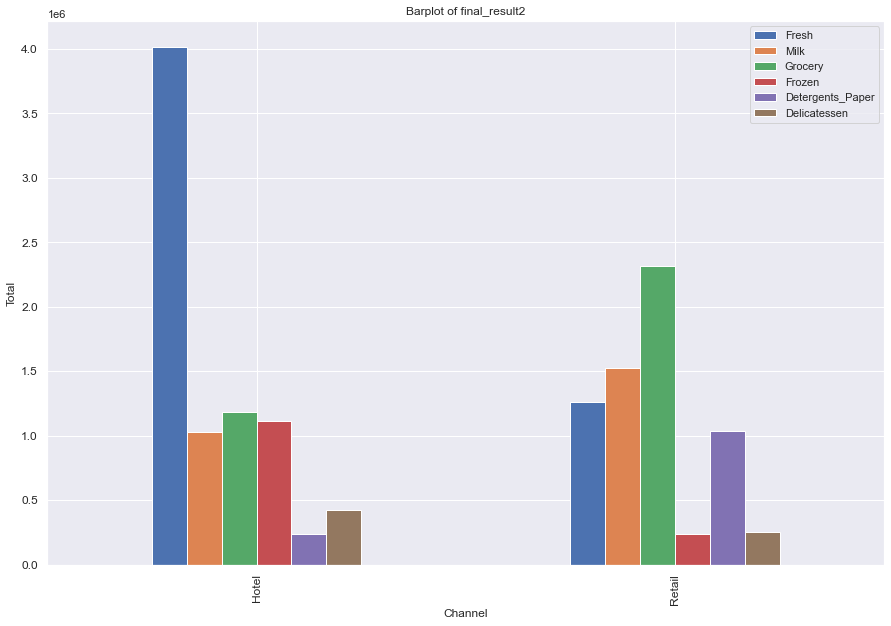

In [185]:

ax2= final_result2[["Fresh",'Milk',"Grocery","Frozen","Detergents_Paper","Delicatessen"]].plot(kind='bar', title ="Barplot of final_result2", figsize=(15, 10), legend=True, fontsize=12)
ax2.set_xlabel("Channel", fontsize=12)
ax2.set_ylabel("Total", fontsize=12)
plt.show()                    #Barplot of different varieties across Channel is shown
# the spending of "fresh" variety  in hotel channel is the largest whereas the spending of "frozen" in retail channel is the lowest.


1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [186]:
data

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [187]:
new_data=data.drop(['Buyer/Spender','Total'], axis= 1)
new_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


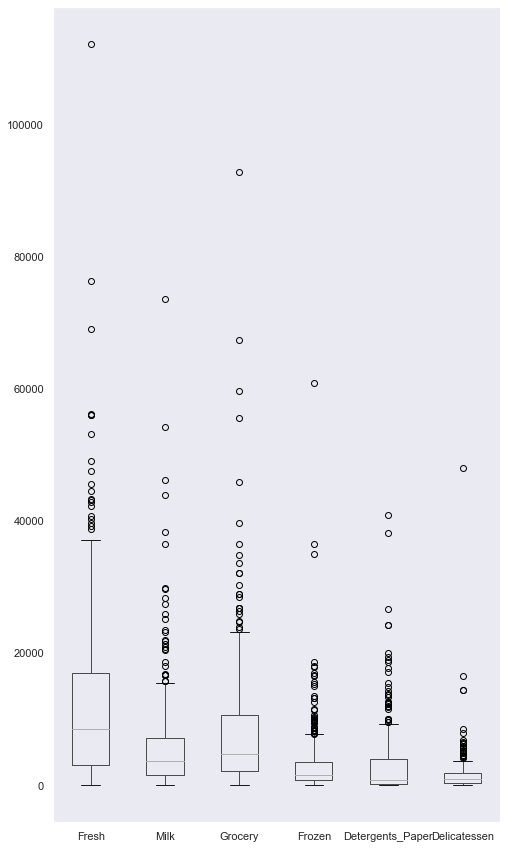

In [188]:
plt.figure(figsize=(8,15))                              #The outliers gives the idea of unusual data values which are distant from the rest of the data.More number of Outliers means the prediction will be more uncertain.
new_data.boxplot(fontsize=None, rot=0,grid=False);
plt.show()                                                #"Fresh"shows the most inconsistent behaviour and "Delicatessen"shows the least inconsistent behaviour,

In [189]:
 #The Inter Quartile range (length of the box) gives us an idea about how dispersed the data is. Here,dispersion is maximum in "Fresh" and minimum in "Delicatessen"
IQR = new_data.quantile(0.75) - new_data.quantile(0.25)
print(IQR)                                          
#The most compact data is in "Delicatessen" and the most spread out data is in "Fresh".. IF the box plot is relatively short, then the data is more compact. If the box plot is relatively tall, then the data is spread out

Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
dtype: float64


In [190]:
 new_data.std()               #standard deviation is a measure of how dispersed the data is in relation to the mean.
                                #the largest dispersion is in is in "Fresh" and the smallest dispersion is in "Delicatessen"

C:\Users\utkar\AppData\Local\Temp/ipykernel_21088/3775007861.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data.std()               #standard deviation is a measure of how dispersed the data is in relation to the mean.


Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.



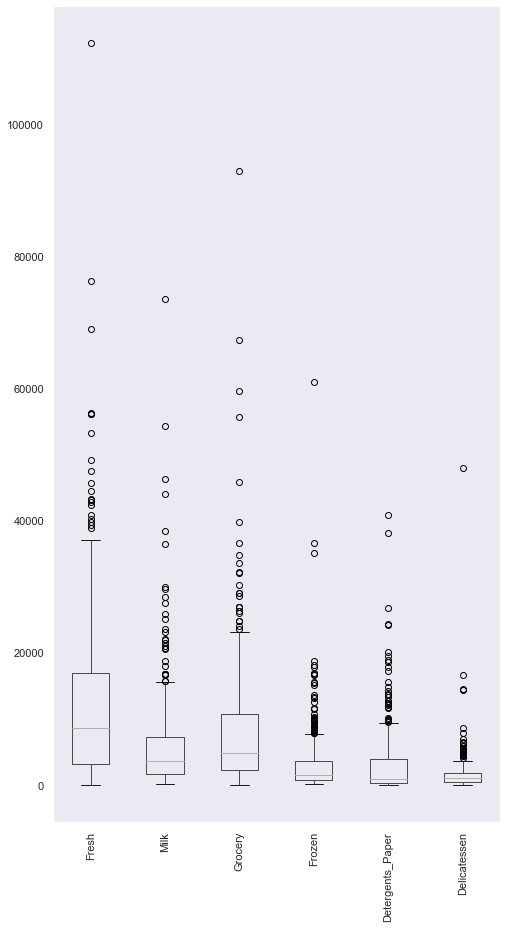

In [191]:
plt.figure (figsize=(8,15))                               #Yes,all the 6 varieties have many outliers in the data.
new_data.boxplot(fontsize=None, rot=90,grid=False);
plt.show()

In [192]:
Q1=new_data.quantile(0.25)
Q3=new_data.quantile(0.75)
outlier_check= (new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))
outlier_check                           #Outliers are greater than (Q3+1.5*IQR) or less than (Q1-1.5*IQR).
       #All the "True" indicate the presence of outliers.

C:\Users\utkar\AppData\Local\Temp/ipykernel_21088/701409107.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_check= (new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))


,Channel,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,True,False,False,False
436,False,False,False,True,False,False,False,False
437,False,False,True,False,False,True,False,False
438,False,False,False,False,False,False,False,False


 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

##"Fresh" variety is widely used by the retailers across all regions and channels.But  Frozen,Detergents_Paper,Delicatessen are not used that much.We can make an attempt to improve the quality of these varieties and sell them where the demand is more.
  Also,there are many buyers/spenders in the "other"region but they lack in other regions.
So,we can try ways to optimise retail efficiency in other regions as well.

Problem 2: The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [193]:
df=pd.read_csv("Survey.csv")
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [196]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [197]:
df.shape

(62, 14)

In [198]:
df.size

868

In [199]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [200]:
pd.crosstab(df["Gender"], df["Major"])              #A contingency table is a type of table that summarizes the relationship between two categorical variables.
                                                     #To create a contingency table in Python, we can use the pandas.crosstab() function,

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [201]:
pd.crosstab(df["Gender"], df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [202]:
pd.crosstab(df["Gender"], df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [203]:
pd.crosstab(df["Gender"], df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [204]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [205]:
total_people=df['Gender'].value_counts().sum()                               
total_people

62

In [206]:
males_total=(df['Gender'] =='Male').sum()
males_total

29

In [207]:
females_total = (df['Gender'] =='Female').sum()
females_total

33

In [208]:
prob_male=males_total/total_people
prob_male                                    

0.46774193548387094

In [209]:
print(" the probability that a randomly selected CMSU student will be male",prob_male)

 the probability that a randomly selected CMSU student will be male 0.46774193548387094


In [210]:
prob_female=females_total/total_people          
prob_female                                    

0.532258064516129

In [211]:
print(" the probability that a randomly selected CMSU student will be female", prob_female )

 the probability that a randomly selected CMSU student will be female 0.532258064516129


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [212]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [213]:
pd.crosstab(index=df['Gender'],columns=df['Major'],margins=True,normalize="index")             
# To find conditional probability ,we need to add two parameters i.e. Margins=True and normalize="index" in the crosstab function.
#conditional probability of different majors among the male and female students in CMSU is shown.


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [214]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [215]:
df['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [216]:
df["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [217]:
df.groupby(['Gender', 'Grad Intention']).size()

Gender  Grad Intention
Female  No                 9
        Undecided         13
        Yes               11
Male    No                 3
        Undecided          9
        Yes               17
dtype: int64

In [218]:
male_and_grad=pd.crosstab(df["Gender"], df['Grad Intention'],margins = True,normalize="index")  #This is conditional probability
male_and_grad                          #  probability That a randomly chosen student is a male and intends to graduate is 0.586207

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.272727,0.393939,0.333333
Male,0.103448,0.310345,0.586207
All,0.193548,0.354839,0.451613


In [219]:
df['Computer'].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [220]:
df.groupby(['Gender', 'Computer']).size()

Gender  Computer
Female  Desktop      2
        Laptop      29
        Tablet       2
Male    Desktop      3
        Laptop      26
dtype: int64

In [221]:
pd.crosstab(df['Gender'], df['Computer'],margins = True,normalize='index')          #The probability that a randomly selected student is a female and does NOT have a laptop is 0.060606+0.060606 or 1-0.878788=0.121212

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,0.060606,0.878788,0.060606
Male,0.103448,0.896552,0.000000
All,0.080645,0.887097,0.032258


 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [222]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [223]:
df['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [224]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [225]:
full_time_emp = (df['Employment'] =='Full-Time').sum()
full_time_emp

10

In [226]:
gender_male=(df["Gender"]=='Male').sum()
gender_male

29

In [227]:
male_full_time_emp = ((df['Employment'] =='Full-Time') & (df['Gender'] =='Male')).sum()
male_full_time_emp


7

In [228]:
df.groupby(['Gender', 'Employment']).size()

Gender  Employment
Female  Full-Time      3
        Part-Time     24
        Unemployed     6
Male    Full-Time      7
        Part-Time     19
        Unemployed     3
dtype: int64

In [229]:
total=df['Gender'].size
total


62

In [230]:
prob_of_male =gender_male/total
prob_of_male

0.46774193548387094

In [231]:
prob_of_fulltime_emp =full_time_emp/total
prob_of_fulltime_emp

0.16129032258064516

In [232]:
prob_of_male_fulltime = male_full_time_emp/total

prob_of_male_fulltime

0.11290322580645161

In [233]:
p=prob_of_male+prob_of_fulltime_emp -prob_of_male_fulltime           #p(a union b)=p(a)+p(b)-p(a intersection b)
p

0.5161290322580645

In [234]:
print("the probability that a randomly chosen student is a male or has full-time employment is", p)


the probability that a randomly chosen student is a male or has full-time employment is 0.5161290322580645


 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [235]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [236]:
df['Major'].value_counts()

Retailing/Marketing       14
Economics/Finance         11
Management                10
Other                      7
Accounting                 7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64

In [237]:
df["Gender"].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [238]:
df.groupby(['Gender', 'Major']).size()

Gender  Major                 
Female  Accounting                3
        CIS                       3
        Economics/Finance         7
        International Business    4
        Management                4
        Other                     3
        Retailing/Marketing       9
Male    Accounting                4
        CIS                       1
        Economics/Finance         4
        International Business    2
        Management                6
        Other                     4
        Retailing/Marketing       5
        Undecided                 3
dtype: int64

In [239]:
df_female = (df['Gender']=='Female').sum()
df_female 

33

In [240]:
fem_int_buisness = ((df['Gender']=='Female') & (df['Major'] == 'International Business')).sum()
fem_int_buisness

4

In [241]:
fem_mngt = ((df['Gender']=='Female') & (df['Major'] == 'Management')).sum()
fem_mngt

4

In [242]:
value= fem_int_buisness+fem_mngt
value


8

In [243]:
(value/df_female)                     

0.24242424242424243

In [244]:
print('Probability that given a female student is randomly chosen, she is majoring in international business or management', (value)/(df_female) ) 

Probability that given a female student is randomly chosen, she is majoring in international business or management 0.24242424242424243


2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [245]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [246]:
df["Grad Intention"].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [247]:
df["Grad Intention"]=="Undecided"

0     False
1     False
2     False
3     False
4      True
      ...  
57    False
58    False
59    False
60    False
61    False
Name: Grad Intention, Length: 62, dtype: bool

In [248]:
df[df["Grad Intention"]=="Undecided"]

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100
12,13,Male,22,Senior,International Business,Undecided,3.4,Part-Time,40.0,2,3,400,Desktop,45
13,14,Male,22,Senior,International Business,Undecided,3.1,Part-Time,40.0,1,3,400,Laptop,150
15,16,Male,24,Senior,Management,Undecided,3.4,Part-Time,45.0,4,4,500,Laptop,175
16,17,Female,19,Junior,CIS,Undecided,3.7,Part-Time,55.0,1,4,450,Laptop,150
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300


In [249]:
df[df['Grad Intention'] == 'Undecided'].index

Int64Index([ 4,  5,  6,  7,  9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 29, 30, 34,
            42, 45, 47, 49, 52],
           dtype='int64')

In [250]:
df_grad_yesno = df.drop(df[df['Grad Intention'] == 'Undecided'].index)
df_grad_yesno.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [251]:
pd.crosstab(df['Gender'],df_grad_yesno['Grad Intention'] ,margins =True)           #Marginal probability

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [252]:
pd.crosstab(df['Gender'] ,df_grad_yesno['Grad Intention'] ,margins =True,normalize=True)      #Marginal probabilty

Grad Intention,No,Yes,All
Gender,,,
Female,0.225,0.275,0.5
Male,0.075,0.425,0.5
All,0.300,0.700,1.0


In [253]:
 print('The probability that a randomly selected Student is Female',(20/40)) #p(A)=probabilty of being female=0.5

The probability that a randomly selected Student is Female 0.5


In [254]:
print("the probability that a randomly selected student is graduate is",(28/40))   #p(B)=probablity of being graduate=0.70

the probability that a randomly selected student is graduate is 0.7


In [255]:
value = ((df['Gender']=='Female') & (df_grad_yesno['Grad Intention'] == 'Yes')).sum() 
value

11

In [256]:
(value)/20                                  # p(A intersection B)=probabilty of being female and graduate

0.55

In [257]:
print('The probability that a randomly selected student is female and intends to graduate',(value/20) )

The probability that a randomly selected student is female and intends to graduate 0.55


In [258]:
print('They are not independent events')                      # A and B are known as independent events if P(A ∩ B) = P(B) .P(A)
                                                            # here,p(A intersection B) !=P(A) *P(B)

They are not independent events


 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.



In [259]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [260]:
No_of_stud_less3 = (df['GPA'] < 3).sum()
No_of_stud_less3

17

In [261]:
total

62

In [262]:
p_of_stud_less3 =No_of_stud_less3/total
p_of_stud_less3                                                        

0.27419354838709675

In [263]:
print("If a student is chosen randomly,the probability that his/her GPA is less than 3 is ",p_of_stud_less3 )

If a student is chosen randomly,the probability that his/her GPA is less than 3 is  0.27419354838709675


In [264]:
((df['Gender']=='Male') & (df['Salary'] >= 50)).sum()

14

In [265]:

pd.crosstab((df['Gender']=='Male'), (df['Salary'] >= 50),normalize='index')          
                      #To find the conditional probability ,we need to use normalize="index" in the crosstab function

Salary,False,True
Gender,,
False,0.454545,0.545455
True,0.517241,0.482759


In [266]:
print("the conditional probability that a randomly selected male earns 50 or more is", 0.482759)

the conditional probability that a randomly selected male earns 50 or more is 0.482759


In [267]:
((df['Gender']=='Female') & (df['Salary'] >= 50)).sum()

18

In [268]:
pd.crosstab((df['Gender']=='Female'), (df['Salary'] >= 50), normalize='index')
                                                                                            

Salary,False,True
Gender,,
False,0.517241,0.482759
True,0.454545,0.545455


In [269]:
print("conditional probability that a randomly selected female earns 50 or more", 0.545455)

conditional probability that a randomly selected female earns 50 or more 0.545455


2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

 

 #1st method:
 The shapiro wilk test tests the null hypothesis that the data was drawn from normal distribution.

    H0: normal distribution
    
    H1: Non-normal distribution

In [270]:
from scipy.stats import shapiro

In [271]:
 shapiro(df["Salary"])                      #pvalue<alpha   Reject H0
                                        #Data is not normally distributed

ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)

In [272]:
shapiro(df["Spending"])                    #pvalue<alpha #Data is not normally distributed

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

In [273]:
shapiro(df["Text Messages"])                #pvalue<alpha #Data is not normally distributed

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

In [274]:
shapiro(df["GPA"])                          #pvalue>alpha  #Failed to reject H0
                                            # Data is normally distributed

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

In [275]:
#2nd method:Distribution plot:  The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Skewness: 0.534701


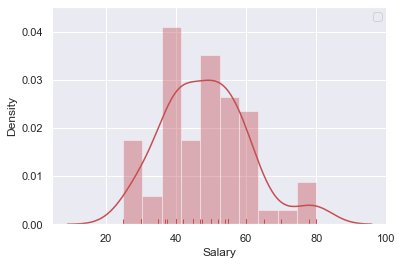

In [276]:
                   
sns.set()
sns.distplot(df['Salary'], bins = 10, kde=True, rug= True,color="r");
print("Skewness: %f" % df["Salary"].skew())
plt.legend()


Skewness: 1.585915


C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


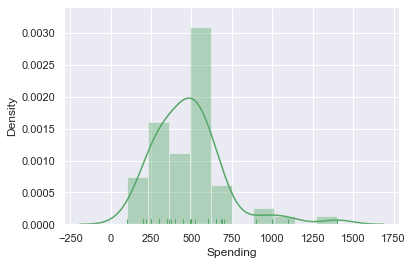

In [277]:
sns.distplot(a=df['Spending'], bins = 10, kde=True, rug= True,color="g");
print("Skewness: %f" % df["Spending"].skew())

Skewness: 1.295808


C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


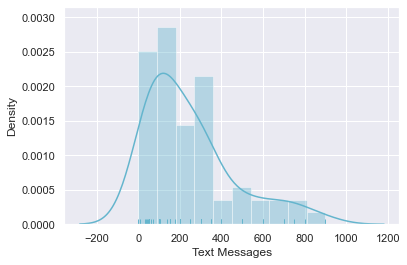

In [278]:
sns.distplot(a=df['Text Messages'], bins = 10, kde=True, rug= True,color="c");
print("Skewness: %f" % df["Text Messages"].skew())

Skewness: -0.314600


C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


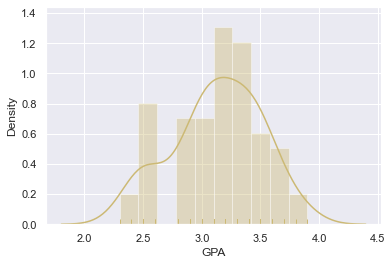

In [279]:
sns.distplot(a=df['GPA'], bins =10, kde=True, rug= True,color="y");
print("Skewness: %f" % df["GPA"].skew())

If the skew value is zero,the data is symmetric.If it is negative ,it means data is skewed left.And if it is right ,it means data is skewed right

In [280]:
#Probability plot: The probabilty plot can be used to find if your data follows a normal distribution or not.

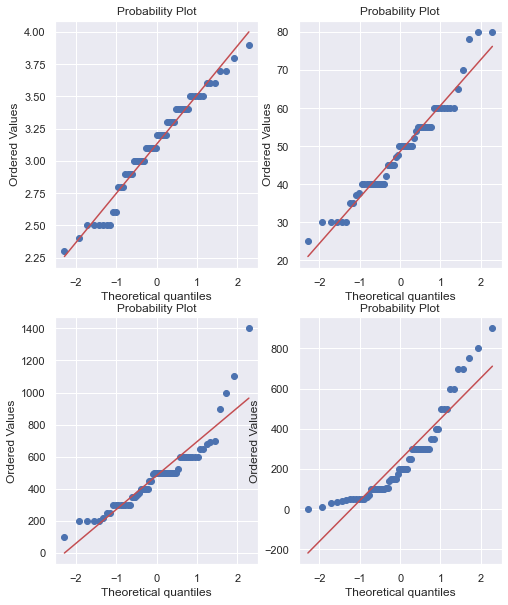

In [281]:
plt.figure(figsize=[8, 10])
plt.subplot(2, 2, 1)
stats.probplot(df['GPA'], plot=plt);
plt.subplot(2, 2, 2)
stats.probplot(df['Salary'], plot=plt);
plt.subplot(2, 2, 3)
stats.probplot(df['Spending'], plot=plt);
plt.subplot(2, 2, 4)
stats.probplot(df['Text Messages'], plot=plt);
plt.show()

#Here all the points follow a straight line.Hence,they follow normal distribution.


 An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Please reflect on all that you have learnt while working on this project. This step is critical in cementing all your concepts and closing the loop. Please write down your thoughts here.

In [282]:
df1=pd.read_csv("A+&+B+Shingles.csv")
df1.head()


,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [283]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [284]:
df1.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [285]:
df1.isnull().sum()

A    0
B    5
dtype: int64

In [286]:
df1["A"].head()

0    0.44
1    0.61
2    0.47
3    0.30
4    0.15
Name: A, dtype: float64

In [287]:
df1["B"].head()

0    0.14
1    0.15
2    0.31
3    0.16
4    0.37
Name: B, dtype: float64

In [288]:
df1["A"].isnull().sum()

0

In [289]:
df1["B"].isnull().sum()

5

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import levene,wilcoxon,shapiro,normaltest 

 # Solution 3.1   Step 1:
 Alternative hypothesis (HA) : mean moisture content> 0.35
    And,Null hypothesis (H0) : mean moisture content <= 0.35
        
    For the A shingles,the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet
    given:H0 : mean moisture content <=0.35 HA : mean moisture content > 0.35
    For the B shingles,the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet 
    given:H0 : mean moisture content <=0.35 HA : mean moisture content > 0.35.


## Step2:Write the significance level
    We'll assume alpha=0.05 ,since it's not given in the question

## Step3:Identify the test statistic: Population mean =0.35,n1=36, n2=31
 We've been given two independent samples only.
 Population standard deviation is not given.We've to check whether the moisture contents in both types of shingles are within the permissible limits.
 Population standard deviation is not given so we can't perform z test.We'll have to do t'test.
 
 There will be 1_sampled t-test for both.
 And since we are checking if the mean moisture content > 0.35.So.it will be  1-tailed test(one-sided).

## Step4: Calculate the pvalue and test statistic

In [291]:
ttest_1samp(a=df1["A"],popmean=0.35,alternative="greater")

Ttest_1sampResult(statistic=-1.4735046253382782, pvalue=0.9252236685509249)

In [292]:
ttest_1samp(a=df1["B"].dropna(),popmean=0.35,alternative="greater")

Ttest_1sampResult(statistic=-3.1003313069986995, pvalue=0.9979095225996808)

## Step 5:
Since pvalue>alpha in both the cases,we failed to reject the null hypothesis.It means that mean moisture content in both types of shingles are within permissible limits.


# 3.2. In testing whether the population mean for the shingles A and B are equal
 ## Step1:Define null and alternate hypothesis:
 The null hypothesis states that the mean moisture content in both the types of shingles are equal

            H0: mu_A=mu_B
            
The alternate hypothesis states that the mean moisture content in both the types of shingles are different.

            H1: mu_1 != mu_B

# Step2: Write the significance level: 
We'll assume alpha=0.05 ,since it's not given in the question

## Step 3: Identify the test statistic:
We have two independent samples and we don't know the population standard deviation and variance.
Sample sizes for both the samples are not same(n>30)
Hence,we'll perform independent 2-sampled t-test.


## Step 4:
Calculate the pvalue and test statistic

In [293]:
ttest_ind(a=df1["A"],b=df1["B"],nan_policy="omit",equal_var=True,alternative="two-sided")

Ttest_indResult(statistic=1.2896282719661123, pvalue=0.2017496571835306)

## Step5:Conclusion: 
Here pvalue > alpha .
We fail to reject null hypothesis.It means (mu_A=mu_B)
We conclude that the mean moisture content in both the types of shingles are equal

# assumption do you need to check before the test for equality of means is performed:
 1) The data is continuous
 
 2) The two groups should be independent of each other.
 
 3) The data should be normally distributed
 
 4) The groups should have equal variance
 
 5) Only two groups are compared

 #  levene test 
 It is performed to check if the variances are equal or not.The levene test tests the null hypothesis 
 that all input samples are from population with equal variances.
    H0: Variances are equal.
    H1: Variances are unequal.

In [294]:
levene(df1["A"],df1["B"].dropna()) 

LeveneResult(statistic=0.23808965111555147, pvalue=0.6272312061867605)

Since pvalue>alpha ,we fail to reject H0. Means Variances are equal.


# Shapiro Test 
The shapiro wilk test tests the null hypothesis that the data was drawn from normal distribution.

    H0: normal distribution
    
    H1: Non-normal distribution


In [295]:
shapiro(df1["A"])                    

ShapiroResult(statistic=0.9375598430633545, pvalue=0.042670514434576035)

#shapiro pvalue<alpha(0.05), we'll reject the null hypothesis.It means the shingles  A was not drawn from normal distribution.

In [296]:
normaltest(df1["B"],nan_policy="omit")

NormaltestResult(statistic=3.727801576956522, pvalue=0.15506656719569256)

#normaltest pvalue>alpha.it means shingles B is normally distributed.